In [1]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import os
import numpy as np
from datetime import datetime



In [2]:
%%capture
%pip install -r requirements.txt
!python -m nltk.downloader stopwords
!python -m nltk.downloader wordnet
!python -m nltk.downloader omw-1.4

In [3]:
# with open('datetime.txt', 'r') as f:
#     filetime = f.read()

In [4]:
binance_coins = ['BNB', 'XRP', 'BCHABC', 'LTC', 'LINK', 'ETC', 'TRX', 'EOS', 'XLM', 'ADA', 'BCH', 'QTUM', 'VET', 'EUR', 'BULL', 'BEAR', 'ETHBULL', 'ETHBEAR', 'ICX', 'BTS', 'BNT', 'ATOM', 'DASH', 'NEO', 'WAVES', 'XTZ', 'EOSBULL', 'EOSBEAR', 'XRPBULL', 'XRPBEAR', 'BAT', 'ENJ', 'NANO', 'ONT', 'RVN', 'STRAT', 'AION', 'ALGO', 'BTT', 'TOMO', 'XMR', 'ZEC', 'BNBBULL', 'BNBBEAR', 'DATA', 'SOL', 'CTSI', 'ERD', 'HBAR', 'MATIC', 'WRX', 'ZIL', 'KNC', 'REP', 'LRC', 'IQ', 'GBP', 'DGB', 'COMP', 'BKRW', 'SXP', 'SNX', 'VTHO', 'DCR', 'STORJ', 'IRIS', 'MKR', 'DAI', 'RUNE', 'MANA', 'DOGE', 'LEND', 'ZRX', 'AUD', 'FIO', 'AVA', 'IOTA', 'BAL', 'YFI', 'BLZ', 'KMD', 'JST', 'SRM', 'ANT', 'CRV', 'SAND', 'OCEAN', 'NMR', 'DOT', 'LUNA', 'IDEX', 'RSR', 'PAXG', 'WNXM', 'TRB', 'BZRX', 'SUSHI', 'YFII', 'KSM', 'EGLD', 'DIA', 'BEL', 'SWRV', 'WING', 'CREAM', 'UNI', 'AVAX', 'FLM', 'CAKE', 'XVS', 'ALPHA', 'VIDT', 'AAVE', 'NEAR', 'FIL', 'INJ', 'AERGO', 'ONE', 'AUDIO', 'CTK', 'BOT', 'KP3R', 'AXS', 'HARD', 'DNT', 'CVP', 'STRAX', 'FOR', 'UNFI', 'FRONT', 'BCHA', 'ROSE', 'SYS', 'HEGIC', 'PROM', 'SKL', 'COVER', 'GHST', 'DF', 'JUV', 'PSG', 'BTCST', 'TRU', 'DEXE', 'USDC', 'TUSD', 'PAX', 'CKB', 'TWT', 'LIT', 'SFP', 'FXS', 'DODO', 'BAKE', 'UFT', '1INCH', 'BAND', 'GRT', 'IOST', 'OMG', 'REEF', 'ACM', 'AUCTION', 'PHA', 'TVK', 'BADGER', 'FIS', 'OM', 'POND', 'DEGO', 'ALICE', 'CHZ', 'BIFI', 'LINA', 'PERP', 'RAMP', 'SUPER', 'CFX', 'XVG', 'EPS', 'AUTO', 'TKO', 'TLM', 'BTG', 'HOT', 'MIR', 'BAR', 'FORTH', 'BURGER', 'SLP', 'SHIB', 'ICP', 'AR', 'POLS', 'MDX', 'MASK', 'LPT', 'NU', 'RLC', 'CELR', 'ATM', 'ZEN', 'FTM', 'THETA', 'WIN', 'KAVA', 'XEM', 'ATA', 'GTC', 'TORN', 'COTI', 'KEEP', 'SC', 'CHR', 'STMX', 'HNT', 'FTT', 'DOCK', 'ERN', 'KLAY', 'UTK', 'IOTX', 'BOND', 'MLN', 'LTO', 'ADX', 'QUICK', 'C98', 'CLV', 'QNT', 'FLOW', 'XEC', 'MINA', 'RAY', 'FARM', 'ALPACA', 'ORN', 'MBOX', 'WAXP', 'TRIBE', 'GNO', 'MTL', 'OGN', 'POLY', 'DYDX', 'ELF', 'USDP', 'GALA', 'SUN', 'ILV', 'REN', 'YGG', 'STX', 'FET', 'ARPA', 'LSK', 'FIDA', 'DENT', 'AGLD', 'RAD', 'HIVE', 'STPT', 'BETA', 'RARE', 'TROY', 'CHESS', 'SCRT', 'CELO', 'DAR', 'BNX', 'RGT', 'LAZIO', 'OXT', 'MOVR', 'CITY', 'ENS', 'ANKR', 'QI', 'POWR', 'JASMY', 'AMP', 'PLA', 'PYR', 'RNDR', 'ALCX', 'MC', 'COCOS', 'ANY', 'BICO', 'FLUX', 'REQ', 'VOXEL', 'COS', 'CTXC', 'HIGH', 'CVX', 'PEOPLE', 'OOKI', 'MDT', 'NULS', 'SPELL', 'UST', 'JOE', 'DUSK', 'ACH', 'IMX', 'GLMR', 'UMA', 'LOKA', 'API3', 'ACA', 'ANC', 'XNO', 'WOO', 'TFUEL', 'ASTR', 'GMT', 'KDA', 'APE', 'ALPINE', 'BSW', 'SANTOS', 'MULTI', 'PORTO', 'BTTC', 'MBL', 'MOB', 'NEXO', 'GAL', 'LDO', 'EPX', 'STEEM', 'CVC', 'REI', 'DREP', 'AKRO', 'PUNDIX', 'LUNC', 'USTC', 'OP', 'OG', 'KEY', 'ASR', 'FIRO', 'NKN', 'GTO', 'WBTC', 'LEVER', 'GLM', 'SSV', 'STG', 'ARK', 'BETH', 'LOOM', 'SNM', 'AMB', 'PHB', 'GAS', 'NEBL', 'PROS', 'VIB', 'GMX', 'AGIX', 'SNT', 'POLYX', 'APT', 'QKC', 'OSMO']
groups  = ["Dash2Trade",
"next10xgem1",
"Wallstreetbets_trading",
"BitmexCourses",
"CryptoProfitCoach",
"The_CryptoLogy_Signals"]


In [5]:
import snscrape.modules.telegram as telegram
import pandas as pd

tweets_list = []
for i in groups:
    for x,tel in enumerate(telegram.TelegramChannelScraper(i).get_items()):
        date = str(tel.date).split('+')[0].split()[0]
        time = str(tel.date).split('+')[0].split()[1]
        if  (int(date.split('-')[1])<=9 and int(date.split('-')[2])<=14):
            break
        tweets_list.append([i,date, time, tel.content])
    

In [6]:
tel_df = pd.DataFrame(tweets_list, columns=['Name','Date','Time','Text'])


In [7]:
tel_df= tel_df.iloc[::-1]
tel_df

,Name,Date,Time,Text
4464,The_CryptoLogy_Signals,2022-05-23,15:20:21,"📌 ODIN PLATFORM - For traders, mentors and alg..."
4463,The_CryptoLogy_Signals,2022-07-20,07:15:30,None
4462,The_CryptoLogy_Signals,2022-09-22,17:57:57,The CryptoLogy 💎 • Signals • Alerts 🔔 pinned D...
4461,The_CryptoLogy_Signals,2022-09-22,19:04:06,🚨🚨 *AMAZING NEWS* 🚨🚨✴️ Leading fan token plat...
4460,The_CryptoLogy_Signals,2022-10-03,07:05:01,COIN NAME:#DOT/USDTDirections: Long🚀Entry: $6....
...,...,...,...,...
4,Dash2Trade,2022-11-29,14:26:45,#STMX/USDT Signal Type: Long Leverage: Cross 2...
3,Dash2Trade,2022-11-29,14:33:15,#STMX/USDT Signal Type: Long Leverage: Cross 2...
2,Dash2Trade,2022-11-29,14:43:30,#STMX/USDT Signal Type: Long Leverage: Cross 2...
1,Dash2Trade,2022-11-29,14:48:26,#STMX/USDT Signal Type: Long Leverage: Cross 2...


In [8]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
exclude.remove('.')
exclude.remove('-')
lemma = WordNetLemmatizer()
def text_cleaning(text):
    stop_free = ' '.join([word for word in str(text).split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

tel_df["Cleaned Text"]= tel_df["Text"].apply(text_cleaning)

In [9]:
tel_df.groupby('Name').count()

,Date,Time,Text,Cleaned Text
Name,,,,
BitmexCourses,71,71,71,71
CryptoProfitCoach,257,257,256,257
Dash2Trade,2816,2816,2802,2816
The_CryptoLogy_Signals,163,163,151,163
Wallstreetbets_trading,540,540,539,540
next10xgem1,618,618,578,618


In [10]:
if not os.path.exists('Channels'):
    os.mkdir('Channels')
os.chdir(os.path.join(os.getcwd(),'Channels'))
for i in groups:
    if not os.path.exists(i):
        os.mkdir(i)
    os.chdir(os.path.join(os.getcwd(),i))
    tel_df[tel_df['Name']==i].to_csv('0_'+i+'.csv', mode='w', index=False, header=False)
    os.chdir('/workspace/FinalYear/Channels')
os.chdir("/workspace/FinalYear/")
with open('datetime.txt', 'w') as f:
    f.write(str(datetime.now()))

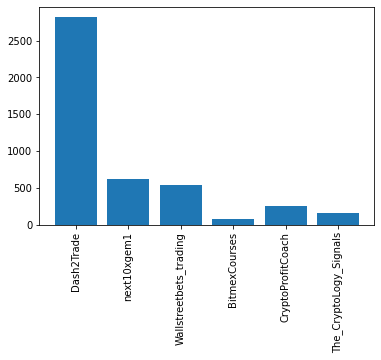

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
count = []
names = []
for group in groups:
    names.append(group)
    count.append(len(tel_df[tel_df['Name']==group]))
plt.bar(names,count)
plt.xticks(rotation=90)
plt.show()

Before Filter 1

In [12]:
def extractor(i):
    i = str(i)
    suffixes = 'usdt|busd|futures'
    coinsregex = '|'.join(binance_coins)
    found = False
    text = re.sub(r'[^\w\s]', ' ', i)
    for s in text.split():
        if re.search("({})({})+|({})+({})|^({})$|[0-9]+({})|({})[0-9]+".format(coinsregex,suffixes,suffixes,coinsregex,coinsregex,coinsregex,coinsregex), s,re.IGNORECASE):
            found = True
            break
    if(found):
        return i
    else: return np.nan
tel_df['Cleaned Text'] = tel_df['Cleaned Text'].apply(extractor)
tel_df_fil1 = tel_df[tel_df['Cleaned Text'].notna()] 

In [13]:
tel_df_fil1

,Name,Date,Time,Text,Cleaned Text
4464,The_CryptoLogy_Signals,2022-05-23,15:20:21,"📌 ODIN PLATFORM - For traders, mentors and alg...","['📌', 'ODIN', 'PLATFORM', '-', 'For', 'trader'..."
4461,The_CryptoLogy_Signals,2022-09-22,19:04:06,🚨🚨 *AMAZING NEWS* 🚨🚨✴️ Leading fan token plat...,"['🚨🚨', 'AMAZING', 'NEWS', '🚨🚨✴️', 'Leading', '..."
4460,The_CryptoLogy_Signals,2022-10-03,07:05:01,COIN NAME:#DOT/USDTDirections: Long🚀Entry: $6....,"['COIN', 'NAMEDOTUSDTDirections', 'Long🚀Entry'..."
4459,The_CryptoLogy_Signals,2022-10-03,07:05:19,COIN NAME:#HBAR/USDTDirections: Long🚀Entry: $0...,"['COIN', 'NAMEHBARUSDTDirections', 'Long🚀Entry..."
4454,The_CryptoLogy_Signals,2022-10-03,07:54:54,COIN NAME:#ADA/USDTDirections: Long🚀#ADA rejec...,"['COIN', 'NAMEADAUSDTDirections', 'Long🚀ADA', ..."
...,...,...,...,...,...
5,Dash2Trade,2022-11-29,14:18:01,DASH 2 TRADE pinned «Now #Btc Needs To break t...,"['DASH', '2', 'TRADE', 'pinned', '«Now', 'Btc'..."
4,Dash2Trade,2022-11-29,14:26:45,#STMX/USDT Signal Type: Long Leverage: Cross 2...,"['STMXUSDT', 'Signal', 'Type', 'Long', 'Levera..."
3,Dash2Trade,2022-11-29,14:33:15,#STMX/USDT Signal Type: Long Leverage: Cross 2...,"['STMXUSDT', 'Signal', 'Type', 'Long', 'Levera..."
2,Dash2Trade,2022-11-29,14:43:30,#STMX/USDT Signal Type: Long Leverage: Cross 2...,"['STMXUSDT', 'Signal', 'Type', 'Long', 'Levera..."


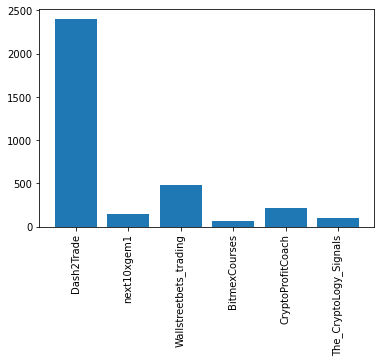

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
count = list()
names = list()
for group in groups:
    names.append(group)
    count.append(len(tel_df_fil1[tel_df_fil1['Name']==group]))
plt.bar(names,count)
plt.xticks(rotation=90)
plt.show()

After Filter 1 

In [15]:
os.chdir("/workspace/FinalYear/")
if not os.path.exists('Channels'):
    os.mkdir('Channels')
os.chdir(os.path.join(os.getcwd(),'Channels'))
for i in groups:
    if not os.path.exists(i):
        os.mkdir(i)
    os.chdir(os.path.join(os.getcwd(),i))
    tel_df_fil1[tel_df_fil1['Name']==i].to_csv('1_'+i+'.csv', mode='a', index=False, header=False)
    os.chdir('/workspace/FinalYear/Channels')
os.chdir("/workspace/FinalYear/")
with open('datetime.txt', 'w') as f:
    f.write(str(datetime.now()))